t-statistic: 3.8474628073115995
p-value: 0.0001673335719739051
The p-value is lower than 0.05, we can reject null hypothesis and say that there is a significant statistical difference between the mean number of nominations for best picture winners and the mean number of nominations for best picture losers.
The mean number of nominations for best picture winners is: 2.58
The standard deviation of nominiations of best picture winners is: 0.759
The total number of films that have won best picture in our chosen years is: 62
The mean number of nominations for best picture losers is: 1.95
The standard deviation of nominiations of best picture losers is: 0.738
The total number of films that have been nominated for best picture and lost in our chosen years is: 297


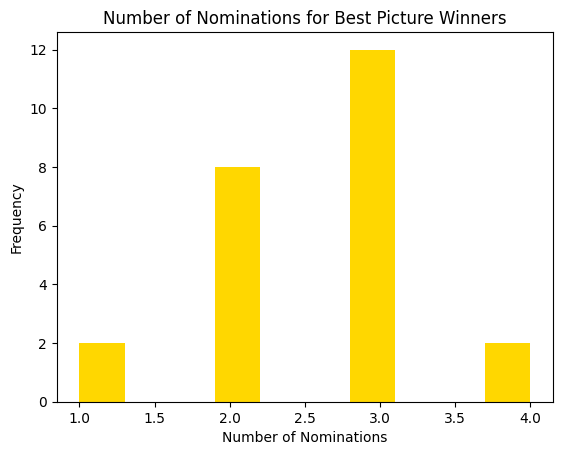

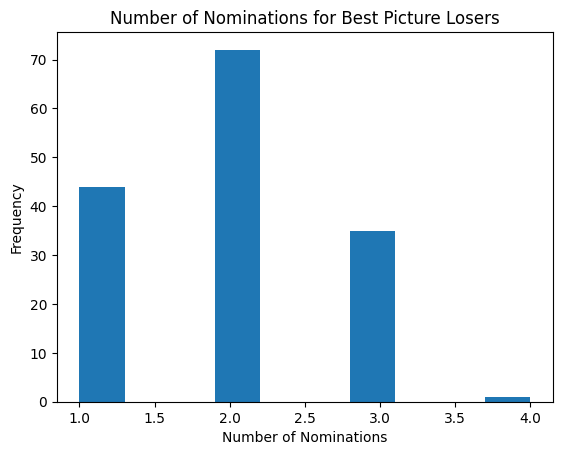

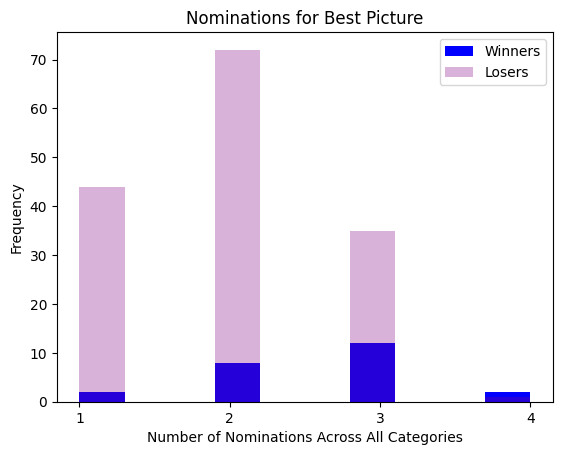

<Figure size 640x480 with 0 Axes>

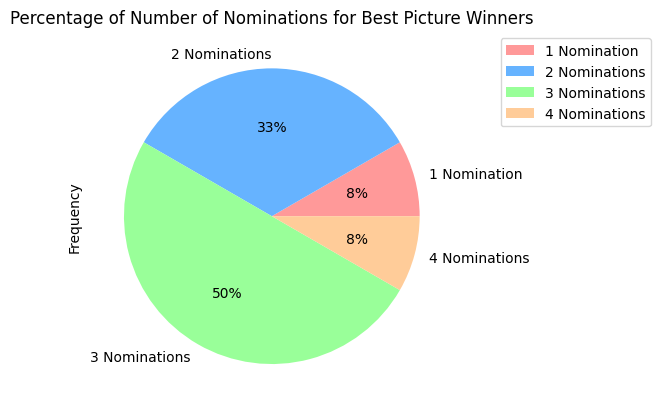

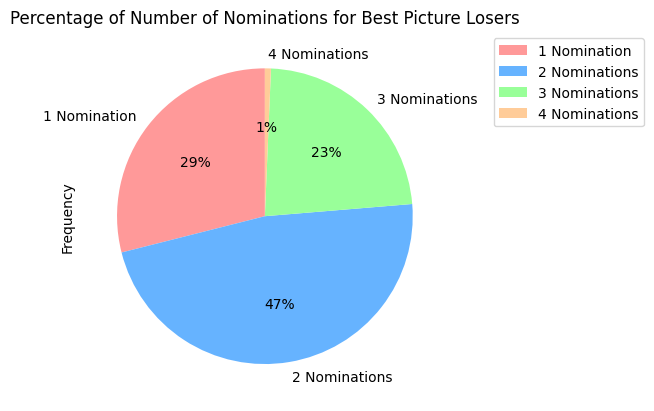

In [3]:
#importing numpy and pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_ind
#loading in csv
all = pd.read_csv('All awards Oscar Data.csv')
df = pd.DataFrame(all)

#selecting data only from 2000 and onwards
data = pd.DataFrame(df[(df['year_ceremony'] >= 2000)])

#removing extraneous data of year film was released and ceremony number
data = data.drop(columns=['year_film', 'ceremony','name'])
data = data.drop(data[data['category'] == 'ART DIRECTION'].index)
data = data.drop(data[data['category'] == 'ACTOR IN A SUPPORTING ROLE'].index)
data = data.drop(data[data['category'] == 'ACTRESS IN A SUPPORTING ROLE'].index)
data = data.drop(data[data['category'] == 'ANIMATED FEATURE FILM'].index)
data = data.drop(data[data['category'] == 'CINEMATOGRAPHY'].index)
data = data.drop(data[data['category'] == 'COSTUME DESIGN'].index)
data = data.drop(data[data['category'] == 'DOCUMENTARY (Feature)'].index)
data = data.drop(data[data['category'] == 'DOCUMENTARY (Short Subject)'].index)
data = data.drop(data[data['category'] == 'FILM EDITING'].index)
data = data.drop(data[data['category'] == 'FOREIGN LANGUAGE FILM'].index)
data = data.drop(data[data['category'] == 'MAKEUP AND HAIRSTYLING'].index)
data = data.drop(data[data['category'] == 'MAKEUP'].index)
data = data.drop(data[data['category'] == 'MUSIC (Original Score)'].index)
data = data.drop(data[data['category'] == 'MUSIC (Original Song)'].index)
data = data.drop(data[data['category'] == 'PRODUCTION DESIGN'].index)
data = data.drop(data[data['category'] == 'SHORT FILM (Animated)'].index)
data = data.drop(data[data['category'] == 'SHORT FILM (Live Action)'].index)
data = data.drop(data[data['category'] == 'SOUND'].index)
data = data.drop(data[data['category'] == 'SOUND EDITING'].index)
data = data.drop(data[data['category'] == 'SOUND MIXING'].index)
data = data.drop(data[data['category'] == 'VISUAL EFFECTS'].index)
data = data.drop(data[data['category'] == 'WRITING (Adapted Screenplay)'].index)
data = data.drop(data[data['category'] == 'WRITING (Original Screenplay)'].index)
data = data.drop(data[data['category'] == 'WRITING (Screenplay Written Directly for the Screen)'].index)
data = data.drop(data[data['category'] == 'WRITING (Screenplay Based on Material Previously Produced or Published)'].index)



#couting nominations with NO WINS in our selected categories
all_actor_nom = pd.DataFrame(data[(data['winner'] == False) & (data['category'] == 'ACTOR IN A LEADING ROLE')])
all_actress_nom = pd.DataFrame(data[(data['winner'] == False) & (data['category'] == 'ACTRESS IN A LEADING ROLE')])
all_pic_nom = pd.DataFrame(data[(data['winner'] == False) & (data['category'] == 'BEST PICTURE')])
all_director_nom = pd.DataFrame(data[(data['winner'] == False) & (data['category'] == 'DIRECTING')])

#putting all nominees (NO WINS) in one dataframe and sorting by year
temp = [all_actor_nom, all_actress_nom, all_pic_nom, all_director_nom]
nominees_work = pd.DataFrame(pd.concat(temp))
nominess_work= nominees_work.sort_values(by=['year_ceremony'])


#finding winners of our chosen categories
best_actor = pd.DataFrame(data[(data['winner'] == True) & (data['category'] == 'ACTOR IN A LEADING ROLE')])
best_actress = pd.DataFrame(data[(data['winner'] == True) & (data['category'] == 'ACTRESS IN A LEADING ROLE')])
best_pic = pd.DataFrame(data[(data['winner'] == True) & (data['category'] == 'BEST PICTURE')])
best_director = pd.DataFrame(data[(data['winner'] == True) & (data['category'] == 'DIRECTING')])

#putting all winners in one dataframe and sorting by year
frame = [best_actor, best_actress, best_pic, best_director]
winners = pd.DataFrame(pd.concat(frame))
winners = winners.sort_values(by=['year_ceremony'])


#finding how many times winners won in total
win_count = pd.DataFrame(winners['film'].value_counts())

#merging total noms and wins into one dataframe
all_nom = pd.DataFrame(data['film'].value_counts()) # this isn't actually needed we can clean this one up later
win_nom = pd.DataFrame(all_nom.merge(win_count, on='film', how='left'))
win_nom = win_nom.dropna()
win_nom = win_nom.astype(int)
win_nom.columns = [ 'nominations', 'wins']

#removing films that have won from nominees category
nom_tuples = set(nominees_work.apply(tuple, axis=1))
win_tuples = set(winners.apply(tuple, axis=1))
filter_nom = nom_tuples - win_tuples
nominees = pd.DataFrame(list(filter_nom), columns=nominees_work.columns)
nominees = nominees.sort_values(by=['year_ceremony'])
nominees

#counting total number of nominations for NON WINNERS
just_nom = pd.DataFrame(nominees['film'].value_counts())
just_nom.columns = [ 'nominations']

win_count = win_nom.drop('wins', axis=1)
win_count



##BEST PICTURE

#number of nominations for best picture winners
win_pic = pd.DataFrame(best_pic)
win_pic = win_pic.sort_values(by=['year_ceremony'])

#finding how many times winners won in picture
pic_win_count = pd.DataFrame(win_pic['film'].value_counts())

#merging picture noms and wins into one dataframe
pic_win_nom = pd.DataFrame(all_nom.merge(pic_win_count, on='film', how='left'))
pic_win_nom = pic_win_nom.dropna()
pic_win_nom = pic_win_nom.astype(int)
pic_win_nom.columns = [ 'nominations', 'wins']

#creating a histogram on best picture winners and analysis
pic_win_nom.hist('nominations', color='gold')
plt.xlabel('Number of Nominations')
plt.ylabel('Frequency')
plt.grid(False)
plt.title('Number of Nominations for Best Picture Winners')

#finding just best picture losers 
pic_some_nom = pd.DataFrame(nominees.drop(nominees[nominees['category'] != 'BEST PICTURE'].index))
pic_nom = pd.DataFrame(nominees.merge(pic_some_nom, on='film'))
pic_nom_count = pd.DataFrame(pic_nom['film'].value_counts())
pic_nom_count.columns = ['nominations']

#creating a histogram on best picture losers and analysis
pic_nom_count.hist('nominations')
plt.xlabel('Number of Nominations')
plt.ylabel('Frequency')
plt.grid(False)
plt.title('Number of Nominations for Best Picture Losers')

pic_win_count = pic_win_nom.drop('wins', axis=1)
pic_win_count

#combining winning and losing across the best picture category
pic_win_count.hist('nominations', color = 'blue', label = 'Winners')
plt.hist(pic_nom_count, alpha = 0.3, color = 'purple' ,label ='Losers')
plt.legend(loc = 'upper right')
plt.xticks(np.arange(1,5))
plt.title('Nominations for Best Picture')
plt.grid(False)
plt.xlabel('Number of Nominations Across All Categories')
plt.ylabel('Frequency')


pic_nom_freq = pd.DataFrame(pic_nom_count['nominations'].value_counts())
pic_win_freq = pd.DataFrame(pic_win_count['nominations'].value_counts())


#creating a pie chart for distribution of number of nominations for winners
plt.figure()
win_labels = ['1 Nomination', '2 Nominations', '3 Nominations', '4 Nominations']
pic_win_freq.groupby(['nominations']).sum().plot(kind='pie', y='count', autopct='%1.0f%%', colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99'], labels = win_labels, startangle = 0)
plt.ylabel('Frequency')
#plt.legend(loc='lower right')
plt.legend(bbox_to_anchor=(1.1, 1), loc="upper left")
plt.title('Percentage of Number of Nominations for Best Picture Winners')


#creating a pie chart for distribution of number of nominations for losers
nom_labels = ['1 Nomination', '2 Nominations', '3 Nominations', '4 Nominations']
pic_nom_freq.groupby(['nominations']).sum().plot(kind='pie', y='count', autopct='%1.0f%%', colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99'], labels = nom_labels, startangle = 90)
plt.ylabel('Frequency')
#plt.legend(loc='lower right')
plt.legend(bbox_to_anchor=(1.1, 1), loc="upper left")
plt.title('Percentage of Number of Nominations for Best Picture Losers')

#running statistics on best picture nomination data
#null hypothesis is that there is no statistical difference between the mean number of nominations for wnners and losers
# perform two-sample t-test
t_stat, p_val = ttest_ind(pic_win_nom['nominations'], pic_nom_count['nominations'])

print('t-statistic:', t_stat)
print('p-value:', p_val)
if p_val < 0.05:
    print('The p-value is lower than 0.05, we can reject null hypothesis and say that there is a significant statistical difference between the mean number of nominations for best picture winners and the mean number of nominations for best picture losers.')

#finding mean and standard deviation of nominations for best picture winners
pic_win_avg = round(pic_win_nom['nominations'].mean(), 2)
pic_win_std = round(np.std(pic_win_nom['nominations']), 3)
total_win_nom = pic_win_count['nominations'].sum()
print('The mean number of nominations for best picture winners is:',pic_win_avg)
print('The standard deviation of nominiations of best picture winners is:', pic_win_std)
print('The total number of films that have won best picture in our chosen years is:', total_win_nom)


#finding mean and standard deviation of nominations for best picture winners
pic_nom_avg = round(pic_nom_count['nominations'].mean(), 2)
pic_nom_std = round(np.std(pic_nom_count['nominations']), 3)
total_nom_count = pic_nom_count['nominations'].sum()
print('The mean number of nominations for best picture losers is:',pic_nom_avg)
print('The standard deviation of nominiations of best picture losers is:', pic_nom_std)
print('The total number of films that have been nominated for best picture and lost in our chosen years is:', total_nom_count)
